In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import time

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect= True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#using inspector to find column names and types
inspector = inspect(engine)
measurement_columns = inspector.get_columns("measurement")
for c in measurement_columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Find the most recent date in the data set.
most_recent=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
year_prior='2016-08-23'
recent='2017-08-23'
# Calculate the date one year from the last date in data set.
last_year_of_data =session.query(Measurement).filter(Measurement.date>=year_prior).filter(Measurement.date<=recent).all()

# Perform a query to retrieve the data and precipitation scores
year_date=[]
yead_prcp=[]
for x in last_year_of_data:
    year_date.append(x.date)
    yead_prcp.append(x.prcp)
    

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_data_df = pd.DataFrame()
year_data_df['Date']=year_date
year_data_df['Precipitation']=yead_prcp
# Sort the dataframe by date
year_data_df=year_data_df.sort_values(by='Date', ascending=True)
#resetting index for readability
year_data_df=year_data_df.reset_index()
year_data_df=year_data_df.drop(columns=['index'])
year_data_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15


In [12]:
#dropping null values and changing date column to date time format
year_data_df=year_data_df.dropna()
year_data_df['Date']=pd.to_datetime(year_data_df['Date'])
year_data_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2021 non-null   datetime64[ns]
 1   Precipitation  2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 47.4 KB


(array([17045., 17106., 17167., 17226., 17287., 17348., 17410.]),
 [Text(17045.0, 0, '2016-09'),
  Text(17106.0, 0, '2016-11'),
  Text(17167.0, 0, '2017-01'),
  Text(17226.0, 0, '2017-03'),
  Text(17287.0, 0, '2017-05'),
  Text(17348.0, 0, '2017-07'),
  Text(17410.0, 0, '2017-09')])

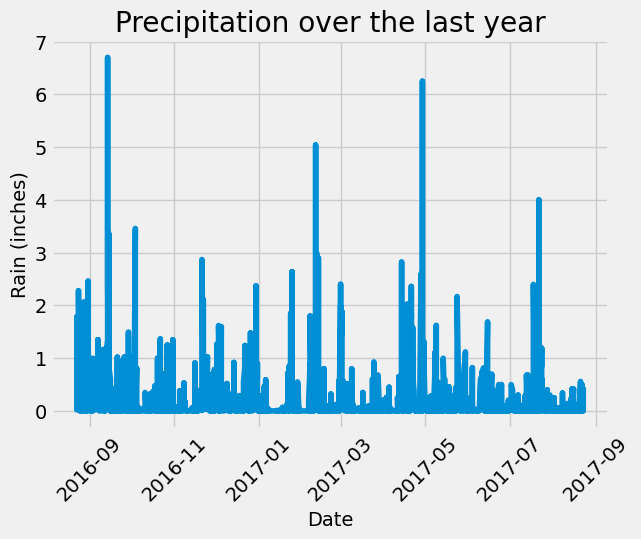

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(year_data_df['Date'],year_data_df['Precipitation'])

plt.title("Precipitation over the last year")
plt.ylabel("Rain (inches)")
plt.xlabel("Date")
# plt.xticks((np.arange(0, max(year_data_df['Date'])+1, 25.0)))
plt.xticks(rotation = 45)

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
year_data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
#using inspector to find column names and types
inspector = inspect(engine)
station_columns = inspector.get_columns("Station")
for c in station_columns:
    print(c["name"],c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [36]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(Station.station).count()
total_stations

9

In [43]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity=session.query(Measurement.station,func.count(Measurement.station)).order_by(func.count(Measurement.station).desc()).group_by(Measurement.station).all()
print(station_activity)
#USC00519281 is the most active station

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [62]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# USC00519281
station_low_temp=session.query(func.min(Measurement.tobs)).all()
station_high_temp=session.query(func.max(Measurement.tobs)).all()
station_avg_temp=session.query(func.avg(Measurement.tobs)).all()
print(f"Low:{station_low_temp}")
print(f"High:{station_high_temp}")
print(f"Average:{station_avg_temp}")

Low:[(53.0,)]
High:[(87.0,)]
Average:[(73.09795396419437,)]


In [82]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Verifying the most recent date:
most_recent1=session.query(Measurement.date).order_by(Measurement.date.desc()).first()

#initializing date range
year_prior1='2016-08-23'
most_recent1='2017-08-23'

#initializing lists to put values into
year_date1=[]
yead_temp1=[]

# Calculating the date one year from the last date in data set.
last_year_of_data1 =session.query(Measurement).filter(Measurement.station=="USC00519281").filter(Measurement.date>=year_prior1).filter(Measurement.date<=most_recent1).all()

# Performing a query to retrieve the data and precipitation scores using a for loop
for x in last_year_of_data1:
    year_date1.append(x.date)
    yead_temp1.append(x.tobs)

(0.0, 70.0)

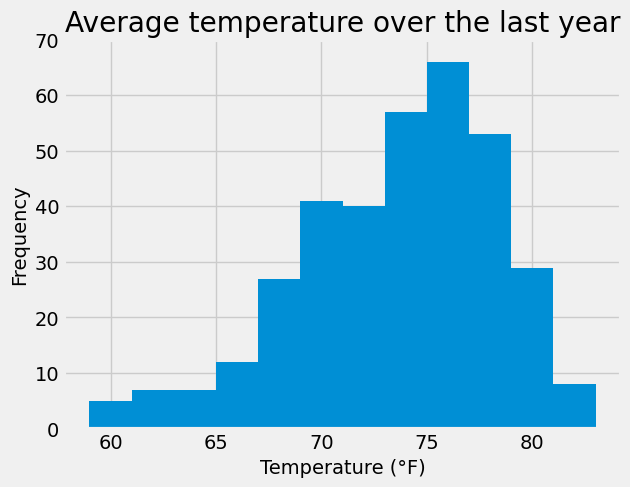

In [89]:
#plotting the results as a histogram
plt.hist(yead_temp1,bins=12)
plt.title("Average temperature over the last year")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.ylim(0,70)



# Close Session

In [88]:
# Close Session
session.close()